# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Building a Logistic Regression based on Titanic passenger information to predict whether a person survived or not
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visual representation of data

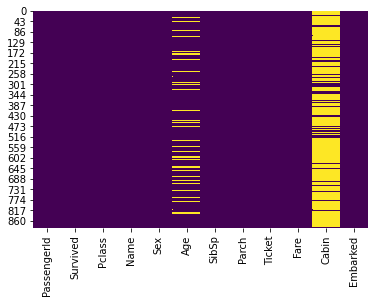

In [3]:
# Heatmap showing heatmap of null values
sns.heatmap(train.isnull(), cbar = False, cmap = 'viridis');

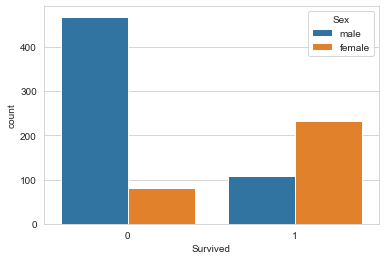

In [4]:
# Plot showing maximum survived was woman
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train);

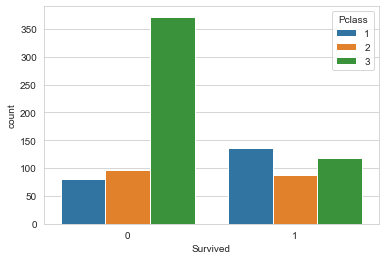

In [5]:
# Plot showing maximum died from class 3
sns.countplot(x = 'Survived', hue = 'Pclass', data = train);

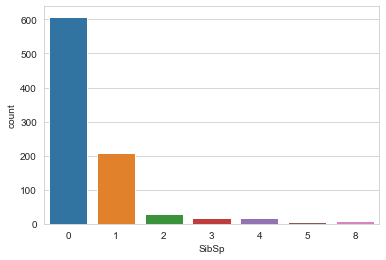

In [6]:
# Plot showing maximum had no sibings/spouse onboard
sns.countplot(x = 'SibSp', data = train);

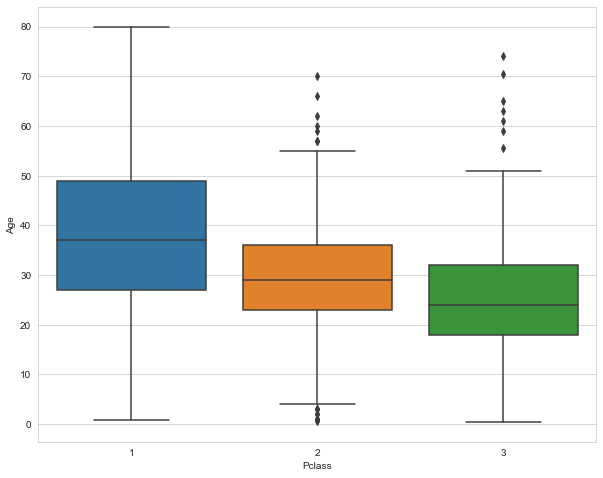

In [7]:
# Plot showing ages accordings to classes
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Pclass', y = 'Age', data = train);

### Data Cleaning

In [8]:
# From above plot we can see age ranges differs by ticket classes
# This function will return appropiate age to fill null values according to ticket class
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 36
        elif Pclass == 2:
            return 30
        else:
            return 24
    else:
        return Age

In [9]:
# Applying the function
train['Age'] = train[['Age','Pclass']].apply(fill_age, axis = 1)

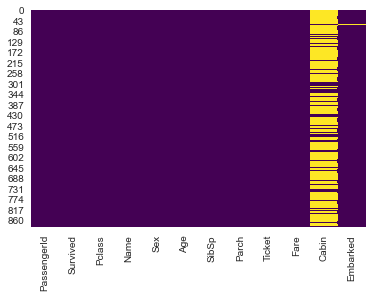

In [10]:
# Now heatmap showing no null values in age column
# But there is lot of missing values in Cabin column
sns.heatmap(train.isnull(), cbar = False, cmap = 'viridis');

In [11]:
# It is better drop this column as it will not contribute so much
train.drop('Cabin', axis = 1, inplace = True)

In [12]:
# Dropping any other row containing null values
train.dropna(inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


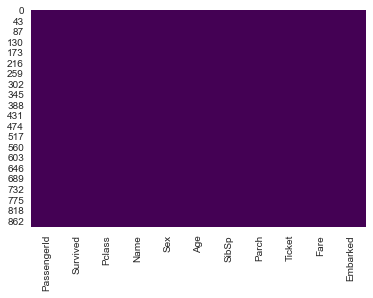

In [13]:
# No null values
sns.heatmap(train.isnull(), cbar = False, cmap = 'viridis');

In [14]:
# Now we need to replace string valued column with integers to train model
# Creating dummies to concat in the dataframe
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [15]:
# Concated
train = pd.concat([train, sex, embark], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [16]:
# Dropping columns that were converted to integer and also some unnecessary columns
train.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)
train.head()
# Data cleaning completed

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Training model

In [17]:
# Split data to train and test
from sklearn.model_selection import train_test_split
X = train.drop('Survived', axis = 1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
# Fit data to Logistic Regression model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000);
logmodel.fit(X_train,y_train);

In [19]:
# Get predictions
predictions = logmodel.predict(X_test)

In [20]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



#### precision = percent of correct predictions
#### recall = percent of the positive cases
#### f1-score = percent of positive predictions
#### support = number of samples of the true response